## Logistic Regression 

In [1]:
# import libraries
import pandas as pd
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
path = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/ChurnData.csv'

In [4]:
df= pd.read_csv(path)
df

,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,...,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,4.40,...,1.0,0.0,1.0,1.0,0.0,1.482,3.033,4.913,4.0,1.0
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,9.45,...,0.0,0.0,0.0,0.0,0.0,2.246,3.240,3.497,1.0,1.0
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,6.30,...,0.0,0.0,0.0,1.0,0.0,1.841,3.240,3.401,3.0,0.0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,6.05,...,1.0,1.0,1.0,1.0,1.0,1.800,3.807,4.331,4.0,0.0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,7.10,...,0.0,0.0,1.0,1.0,0.0,1.960,3.091,4.382,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,55.0,44.0,24.0,83.0,1.0,23.0,0.0,1.0,0.0,17.35,...,0.0,0.0,0.0,1.0,0.0,2.854,3.199,4.419,3.0,0.0
196,34.0,23.0,3.0,24.0,1.0,7.0,0.0,1.0,0.0,6.00,...,0.0,0.0,1.0,1.0,0.0,1.792,3.332,3.178,3.0,0.0
197,6.0,32.0,10.0,47.0,1.0,10.0,0.0,1.0,0.0,3.85,...,0.0,0.0,1.0,1.0,0.0,1.348,3.168,3.850,3.0,0.0
198,24.0,30.0,0.0,25.0,4.0,5.0,0.0,1.0,1.0,8.70,...,1.0,1.0,1.0,1.0,1.0,2.163,3.866,3.219,4.0,1.0


### Data pre-processing and selection

In [5]:
df= df[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip',   'callcard', 'wireless','churn']]
df['churn'] = df['churn'].astype('int')

<ipython-input-5-5cdb3dbbc92b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['churn'] = df['churn'].astype('int')


In [7]:
print(df.shape)
print(df.columns)

(200, 10)
Index(['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip',
       'callcard', 'wireless', 'churn'],
      dtype='object')


In [8]:
# Let Define X
X = np.asarray(df[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip',   'callcard', 'wireless']])
y = np.asarray(df['churn'])

### Train/Test dataset

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=4)
print("Train set: ", X_train.shape, y_train.shape)
print("Train set: ", X_test.shape, y_test.shape)

Train set:  (160, 9) (160,)
Train set:  (40, 9) (40,)


### Modeling (Logistic Regression with Skitit-learn

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver = 'liblinear').fit(X_train, y_train)
LR

LogisticRegression(C=0.01, solver='liblinear')

In [12]:
yhat = LR.predict(X_test)
yhat

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0])

**predict_proba**  returns estimates for all classes, ordered by the label of classes. So, the first column is the probability of class 0, P(Y=0|X), and second column is probability of class 1, P(Y=1|X):


In [13]:
yhat_prob = LR.predict_proba(X_test)
yhat_prob

array([[0.86027354, 0.13972646],
       [0.86440866, 0.13559134],
       [0.75965295, 0.24034705],
       [0.90541415, 0.09458585],
       [0.7302045 , 0.2697955 ],
       [0.52718878, 0.47281122],
       [0.62686342, 0.37313658],
       [0.86761127, 0.13238873],
       [0.42055663, 0.57944337],
       [0.90476351, 0.09523649],
       [0.90852656, 0.09147344],
       [0.94344351, 0.05655649],
       [0.47142991, 0.52857009],
       [0.50947208, 0.49052792],
       [0.86131347, 0.13868653],
       [0.83188719, 0.16811281],
       [0.69567573, 0.30432427],
       [0.83047245, 0.16952755],
       [0.7685668 , 0.2314332 ],
       [0.64272495, 0.35727505],
       [0.8535616 , 0.1464384 ],
       [0.64838979, 0.35161021],
       [0.933414  , 0.066586  ],
       [0.55663167, 0.44336833],
       [0.78998604, 0.21001396],
       [0.95194489, 0.04805511],
       [0.76100903, 0.23899097],
       [0.80282225, 0.19717775],
       [0.59588458, 0.40411542],
       [0.9647679 , 0.0352321 ],
       [0.

## Evaluation
### jaccard index

In [14]:
from sklearn.metrics import jaccard_score
jaccard_score(y_test,yhat, pos_label =0)

0.6486486486486487

### confusion matrix


In [15]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, yhat, labels=[1,0]))

[[ 3 12]
 [ 1 24]]


Confusion matrix, without normalization
[[ 3 12]
 [ 1 24]]


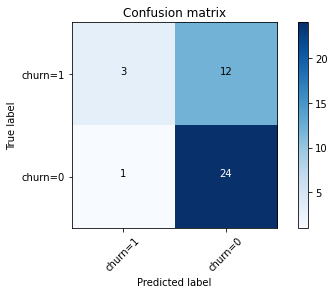

In [16]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['churn=1','churn=0'],normalize= False,  title='Confusion matrix')

In [17]:
print(classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.67      0.96      0.79        25
           1       0.75      0.20      0.32        15

    accuracy                           0.68        40
   macro avg       0.71      0.58      0.55        40
weighted avg       0.70      0.68      0.61        40



Based on the count of each section, we can calculate precision and recall of each label:

*   **Precision** is a measure of the accuracy provided that a class label has been predicted. It is defined by: precision = TP / (TP + FP)

*   **Recall** is the true positive rate. It is defined as: Recall =  TP / (TP + FN)

So, we can calculate the precision and recall of each class.

**F1 score:**
Now we are in the position to calculate the F1 scores for each label based on the precision and recall of that label.

The F1 score is the harmonic average of the precision and recall, where an F1 score reaches its best value at 1 (perfect precision and recall) and worst at 0. It is a good way to show that a classifer has a good value for both recall and precision.

Finally, we can tell the average accuracy for this classifier is the average of the F1-score for both labels, which is 0.72 in our case.


In [18]:
from sklearn.metrics import log_loss
log_loss(y_test, yhat_prob)

0.5658910614888153

In [19]:
LR2 = LogisticRegression(C=0.01, solver='sag').fit(X_train,y_train)
yhat_prob2 = LR2.predict_proba(X_test)
print ("LogLoss: : %.2f" % log_loss(y_test, yhat_prob2))

LogLoss: : 0.62


C:\Users\Salaudeen Ibrahim\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
